In [47]:
import pandas as pd

df = pd.read_csv('Fish.csv')

bream_df = df[df['Species'] == 'Bream']

bream_weight = bream_df['Weight'].tolist()
bream_length = bream_df['Length2'].tolist()

smelt_df = df[df['Species'] == 'Smelt']

smelt_weight = smelt_df['Weight'].tolist()
smelt_length = smelt_df['Length2'].tolist()

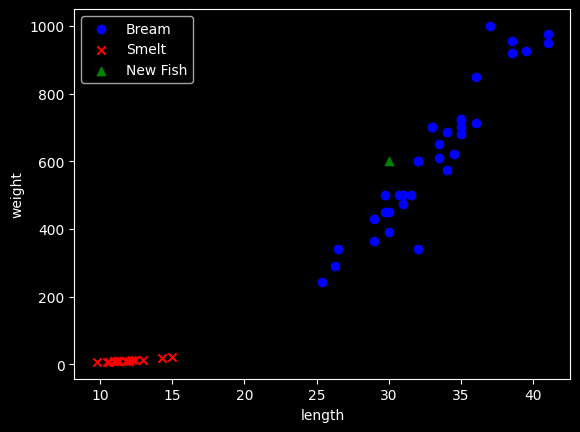

In [48]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, color='blue', marker='o', label='Bream')
plt.scatter(smelt_length, smelt_weight, color='red', marker='x', label='Smelt')
plt.scatter(30, 600, color='green', marker='^', label='New Fish')
plt.xlabel('length')
plt.ylabel('weight')

plt.legend()
plt.show()

In [49]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

fish_target = [1] * 35 + [0] * 14

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

pre = kn.predict([[30,600]])
print(pre)

[1]


In [51]:
k5_score = kn.score(fish_data, fish_target)

kn.n_neighbors = 49
k49_score = kn.score(fish_data, fish_target)
kn.n_neighbors = 5
print(k49_score)
print(k5_score)

0.7142857142857143
1.0


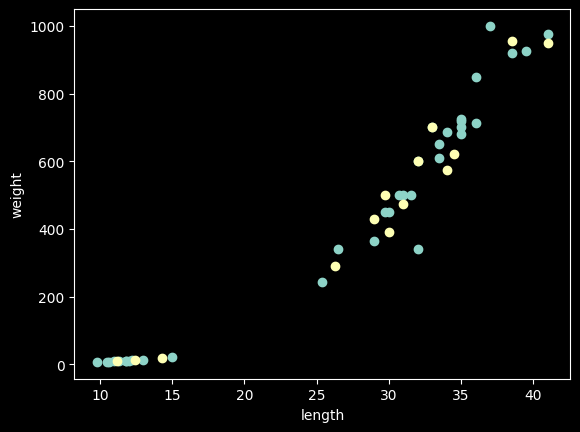

In [52]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(17)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0